# Лабораторна робота No4

# Обробка зображень та робота з наборами файлів цифрових зображень
# Мета: Отримати знання та навики в обробці цифрових зображень за допомогою бібліотек Pillow та/або OpenCV та роботі з обробки набору зображень.

In [44]:
import pandas as pd
import random
import base64
import os
import random
from PIL import Image, ImageOps
from io import BytesIO
from IPython.display import HTML



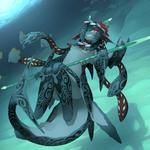
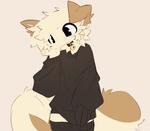
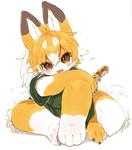
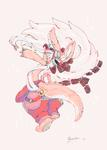
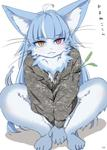
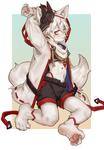
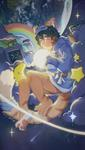
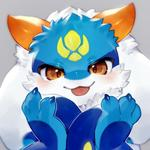
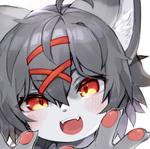
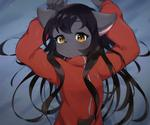
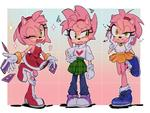
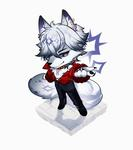
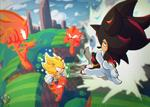
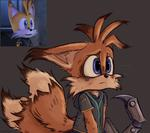
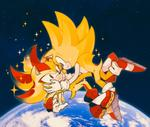

In [45]:
def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((150, 150), Image.LANCZOS)
    return i


def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()


def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'


def get_image_info(folder_path):
    image_data = []

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)

        if os.path.isfile(file_path):
            try:
                img = Image.open(file_path)
                img_format = img.format
                img_mode = img.mode
                img_size = os.path.getsize(file_path) / (1024 * 1024) 
                img_size = round(img_size, 2)
                img_channels = len(img.getbands())
                img_width, img_height = img.size
                reduced_img = img.resize((100, 100)) 
                image_data.append({
                    'File Name': file_name,
                    'Color Model': img_mode,
                    'Format': img_format,
                    'Channels': img_channels,
                    'File Size (MB)': img_size,
                    'Width': img_width,
                    'Height': img_height,
                    'Full Path': file_path,
                    'image': get_thumbnail(file_path)
                })

            except Exception as e:
                print(f"Error processing {file_name}: {e}")

    df = pd.DataFrame(image_data)
    return df


folder_path = "D:\Projects\sem5\DataPython\Lab4\images"
img_set = get_image_info(folder_path)
HTML(img_set.to_html(formatters={'image': image_formatter}, escape=False))

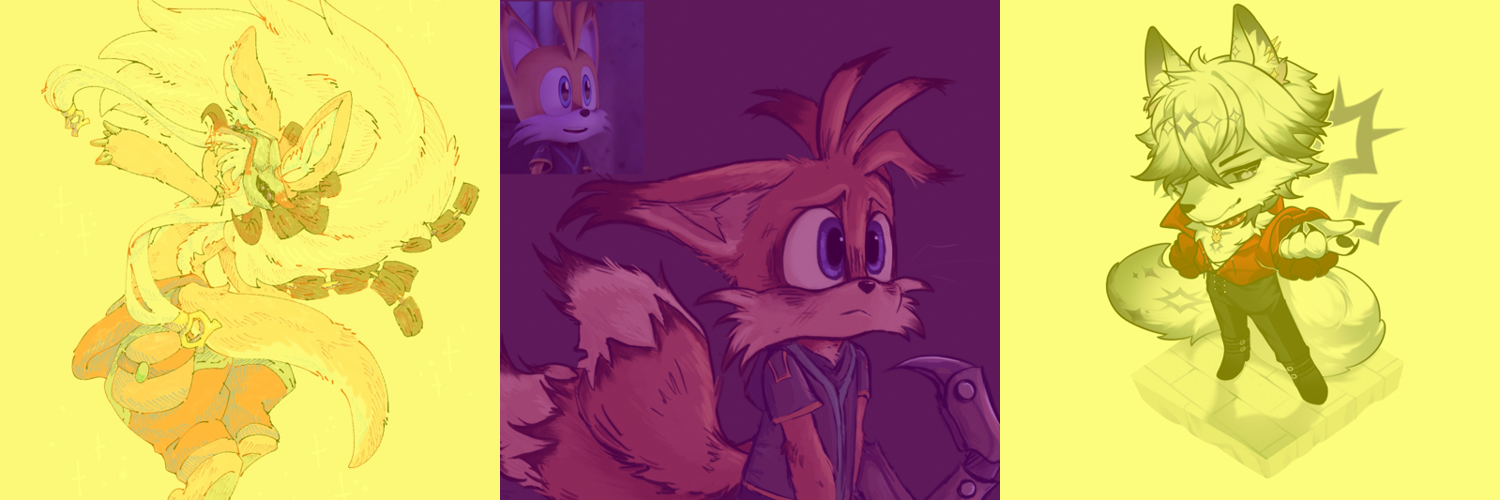

In [46]:
def crop_and_resize(image, target_size):
    width, height = image.size
    new_size = min(width, height)
    left = (width - new_size) // 2
    top = (height - new_size) // 2
    right = (width + new_size) // 2
    bottom = (height + new_size) // 2

    cropped_image = image.crop((left, top, right, bottom))
    resized_image = cropped_image.resize((target_size, target_size))

    return resized_image


def apply_random_color_filter(image):
    filters = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#800080', '#00FFFF']
    selected_filter = random.choice(filters)
    colorized_image = ImageOps.colorize(image.convert("L"), selected_filter, selected_filter)

    blended_image = Image.blend(image, colorized_image.convert("RGB"), alpha=0.5)

    return blended_image

def create_poster(folder_path, output_name, columns, rows):
    images = []

    image_files = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]
    
    if not image_files:
        print(f"No image files found in the folder: {folder_path}")
        return

    for _ in range(columns * rows):
        random_image_path = random.choice(image_files)
        image_path = os.path.join(folder_path, random_image_path)
        while  not image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
            random_image_path = random.choice(image_files)
            image_path = os.path.join(folder_path, random_image_path)
        
        

        try:
            image = Image.open(image_path)

            image = crop_and_resize(image, 533)
            image = image.resize((500, 500))
            image = apply_random_color_filter(image)  

            images.append(image)
        except Exception as e:
            print(f"Error processing {random_image_path}: {e}")
            continue

    total_images = len(images)
    required_images = columns * rows
    if total_images < required_images:
        print(f"Not enough images to create the poster. Expected {required_images}, found {total_images}.")
        return

    # Create the poster
    poster = Image.new('RGB', (columns * 500, rows * 500))

    for i in range(rows):
        for j in range(columns):
            index = i * columns + j
            poster.paste(images[index], (j * 500, i * 500))

    # Save the poster
    poster.save(output_name + '.png')
    return poster

folder_path = "D:\Projects\sem5\DataPython\Lab4\images"

create_poster(folder_path, 'poster1', 3, 1)


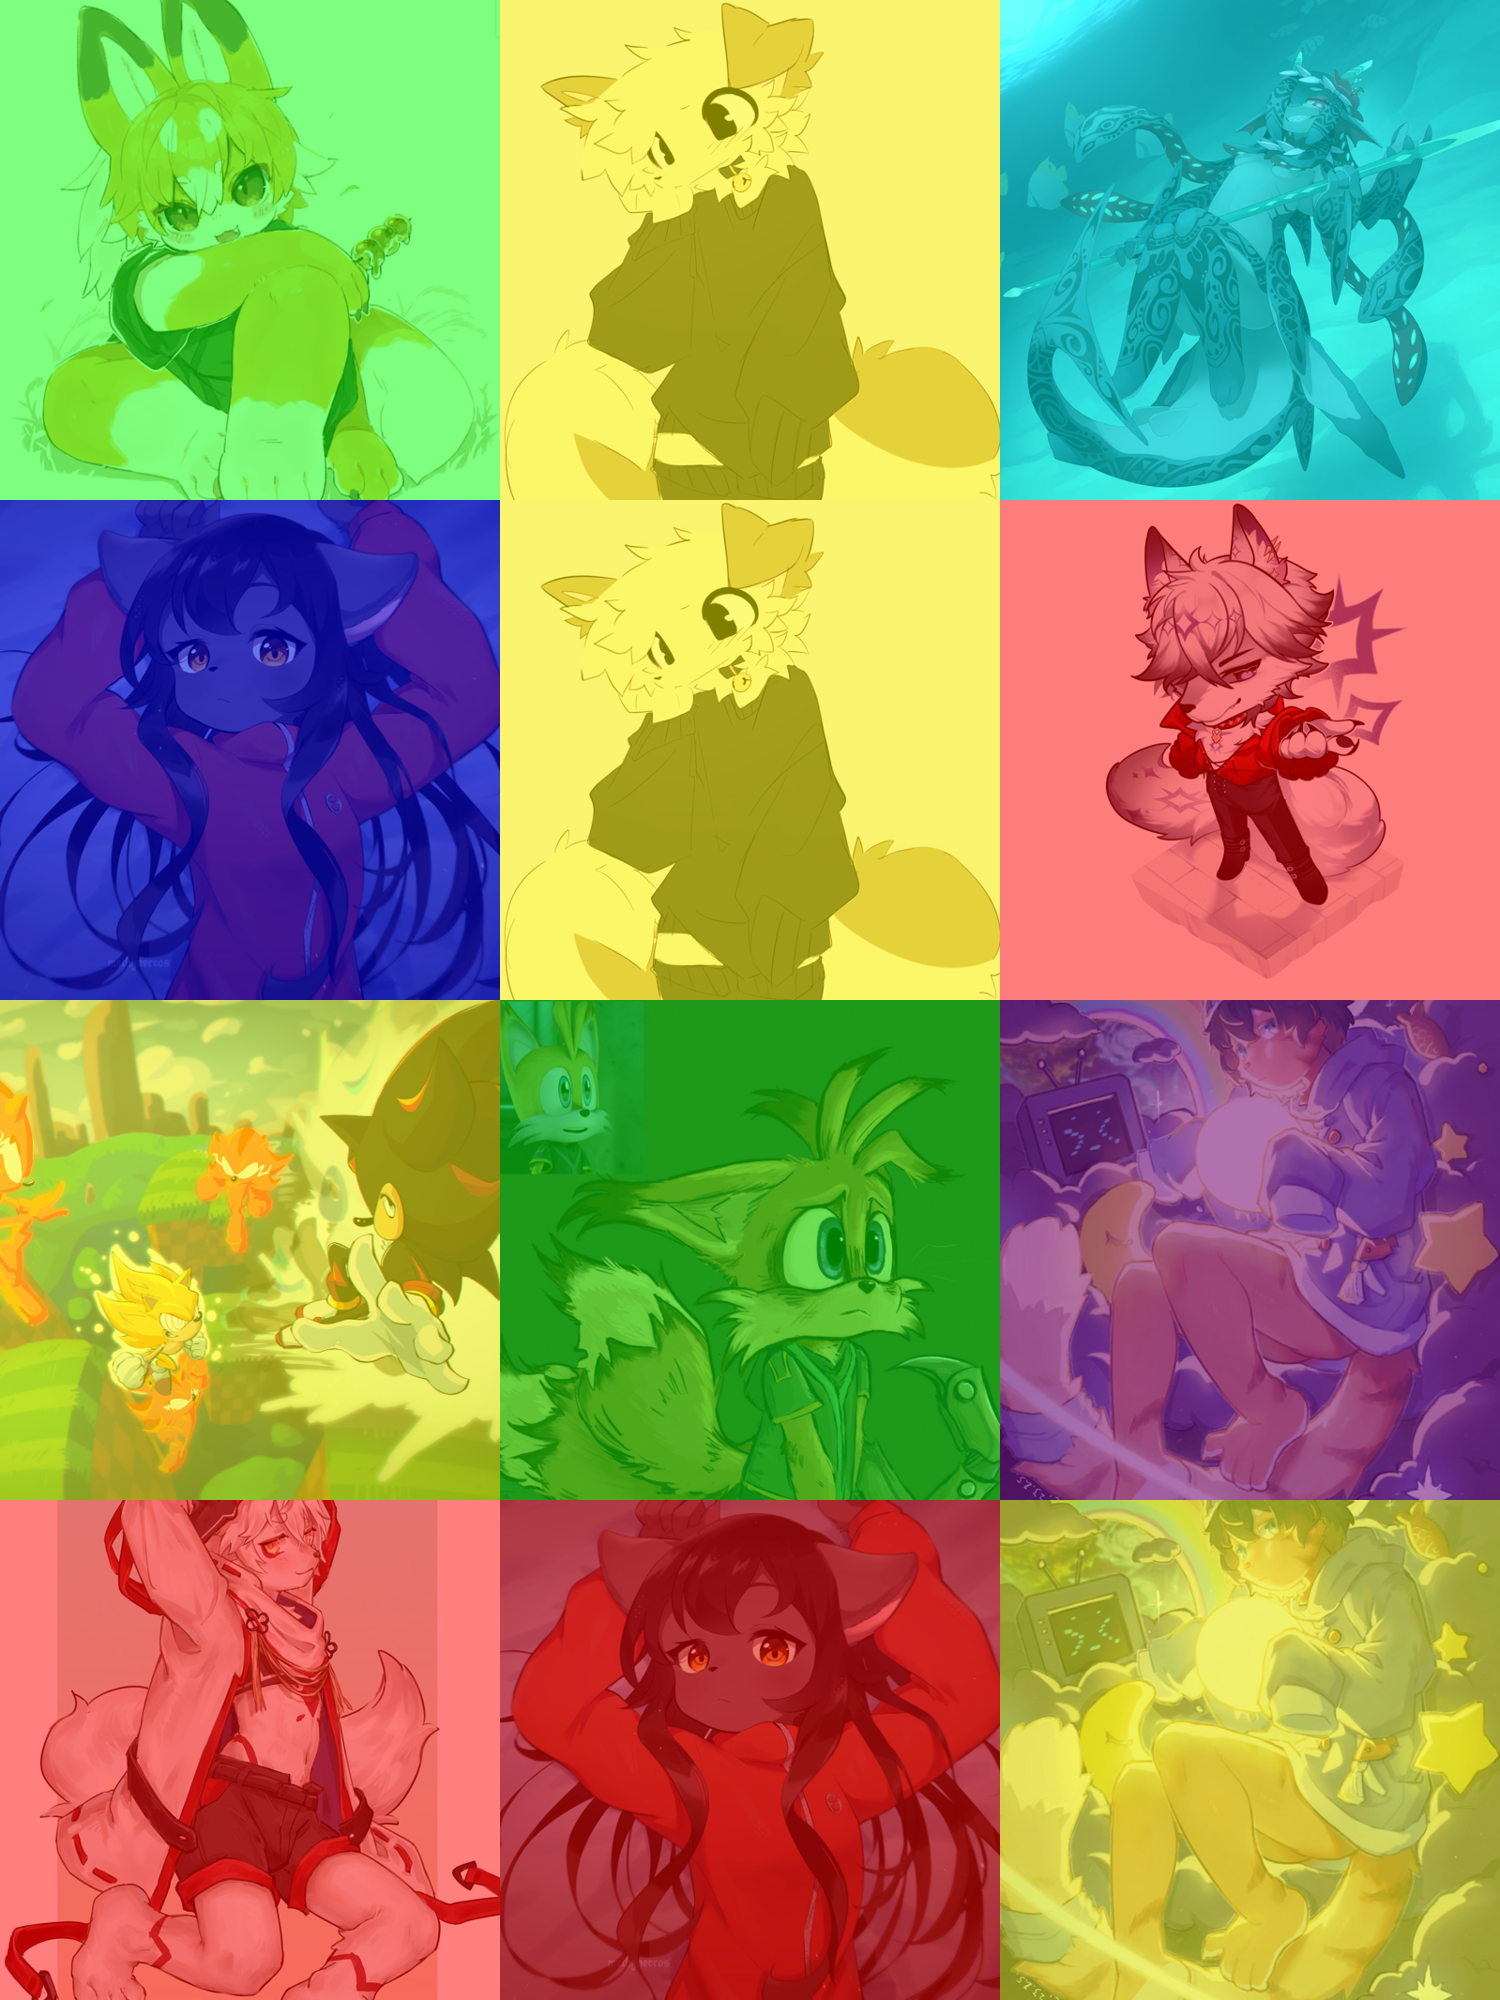

In [47]:
create_poster(folder_path, 'poster2', 3, 4)


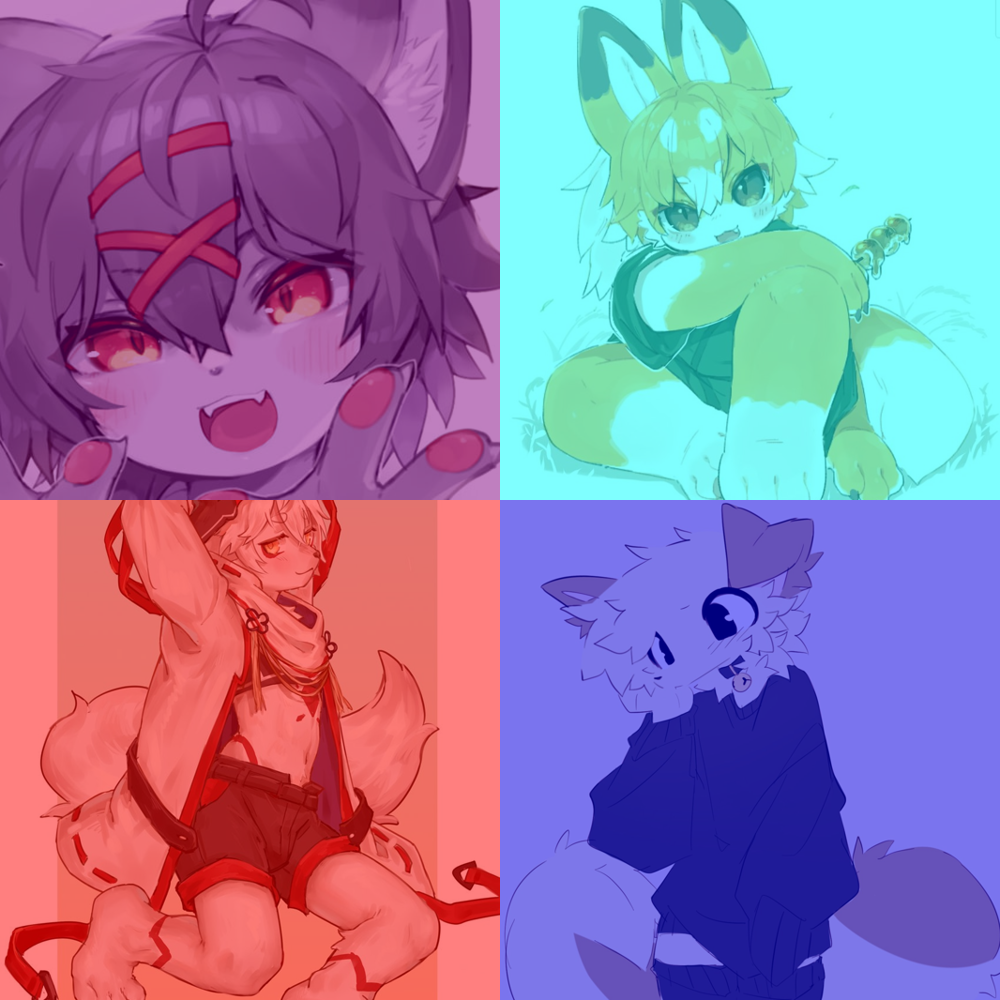

In [48]:
create_poster(folder_path, 'poster3', 2, 2)